# Abstract
Exoplanets are worlds beyond our solar system. Over the past decade, thousands have been discovered through various indirect detecction methods. A dataset of over 3,000 confirmed exoplanets from the team can also be found at the [Exoplanets Database at Kaggle](https://www.kaggle.com/eduardowoj/exoplanets-database/home). The dataset that I'm using is from the PHL Exoplanet catalog, with cleaning and wrangling by me. The data has been taken by the TESS and Kepler Observatories alongside other state and research centers through the interception of Transit Signals. Transit Signals send out radiation that can be monitored through a predictable increase and decrease in luminosity, which models a planet circling its star. 

This notebook examines the correlation between exoplanet hability, which is a floating-point value between 0 and 2; a value of 0 is inahbitable, a value of 1 is conservatively habitable, and a value of 2 is optimistically habitable. This notebook will cover numerous factors that make an exoplanet habitable, such as mass, radius, distance from it's star, temperature, luminosity, and flux. 


## Problem

> * Which traits (planet size, radius, flux) are the most important when dealing with habitability? 

> * How will unnatural phenomenons in space, such as Hot Jupiters or super-earths, affect the credibility of our model?

> * What are the best models to predict and represent the data below?

Additionally, the overview mentions a challenge with regard to data quality.
> The data is well structured in a CSV file, but since it comes from several different sources, some parameters aren't well formated, and will require additional cleaning. 




## Conclusion
Out of over 3000 exoplanets with susbtanial data, I deducted that 1818 exoplanets were unhabitable, 786 exoplanets were conservatively habitable and 775 exoplanets were optimistically habitable. I utilized Logistic Regression, Stochastic GD, Naive Bayes, Passive Aggressive, Perceptron, and Gradient Boosting models to get the above values. Not only that, but this model will be able to predict whether any other novel exoplanets are habitable or not after the user inputs their data. 

In retrospect, the subject domain of the exoplanet data presented was a challenge by itself. There weren't many resources to define columns or group relationships. My major breakthrough was the discovery that detection types played a large role on the presence/availability of data.

Below is my annotated code and data visualization to act as evidence.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes
Output file downloaded to /path/to/dest/KMeans_results.csv
Kernel log downloaded to /path/to/dest/a-small-research-on-exoplanet-habitability.log 


In [ ]:
!unzip phl_exoplanet_catalog_2019.csv.zip


Archive:  phl_exoplanet_catalog_2019.csv.zip
replace phl_exoplanet_catalog_2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: phl_exoplanet_catalog_2019.csv	phl_exoplanet_catalog_2019.csv.zip  sample_data


In [ ]:
!ls

phl_exoplanet_catalog_2019.csv	phl_exoplanet_catalog_2019.csv.zip  sample_data


In [ ]:
# Importing data
import pandas as pd
full_data = pd.read_csv('phl_exoplanet_catalog_2019.csv')

In [ ]:
full_data.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


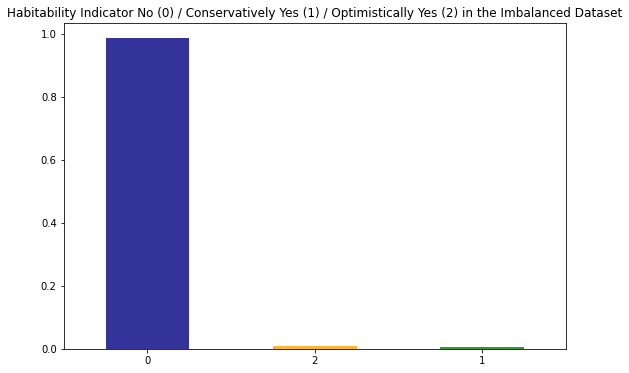

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (9,6))
full_data.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['navy','orange','green'], alpha = 0.8, rot=0)
plt.title('Habitability Indicator No (0) / Conservatively Yes (1) / Optimistically Yes (2) in the Imbalanced Dataset')
plt.show()

In [ ]:
full_data['P_HABITABLE'].value_counts(normalize=True)

0    0.986413
2    0.008399
1    0.005188
Name: P_HABITABLE, dtype: float64

* **Initial Exploration with DABL Library**

In [ ]:
!pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 558 kB 5.3 MB/s 


In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function() {
    return False;
}

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


Target looks like classification
Showing only top 10 of 84 continuous features
Linear Discriminant Analysis training set score: 0.865


[[<Figure size 1440x432 with 10 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 288x288 with 1 Axes>],
 None]

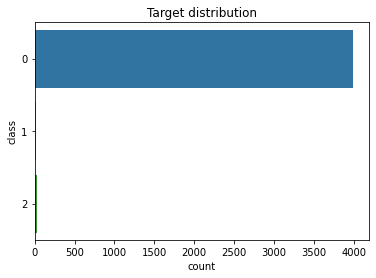

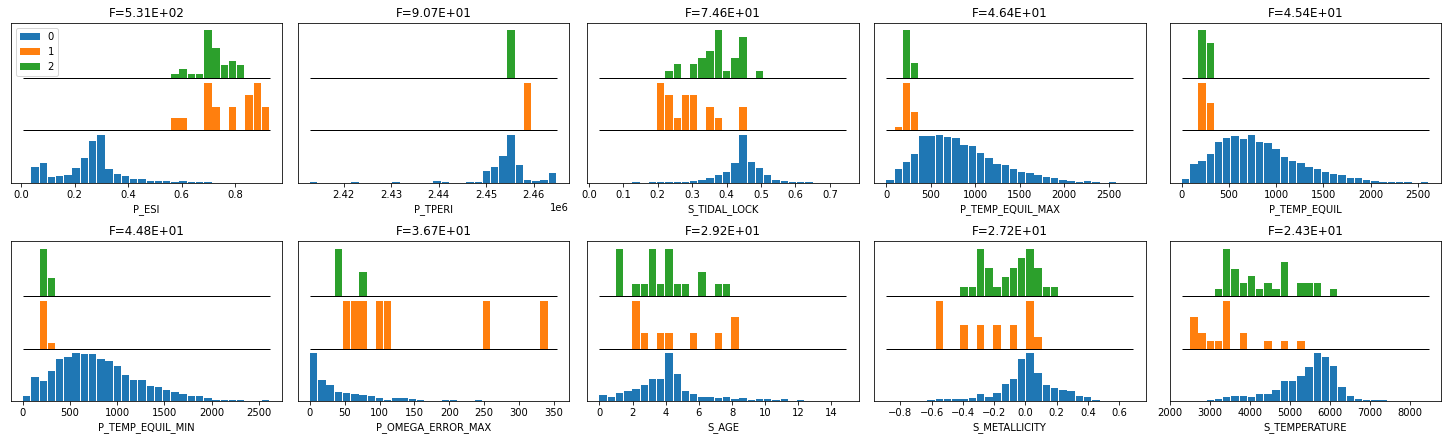

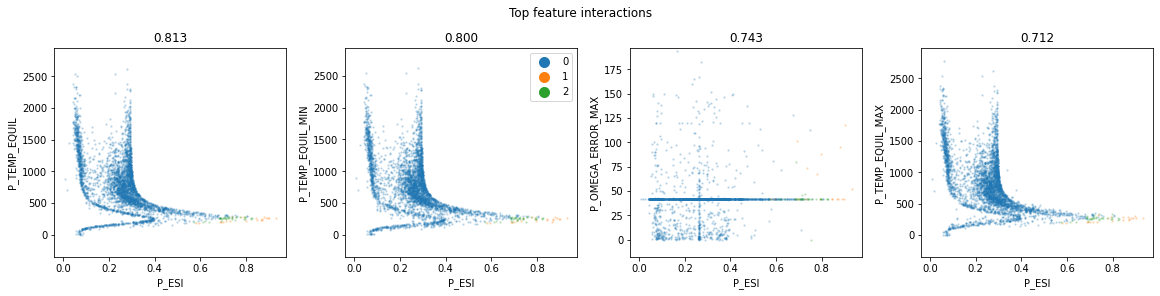

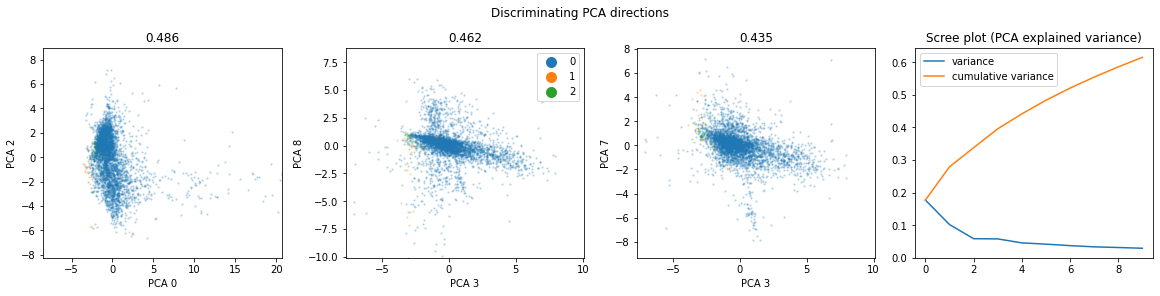

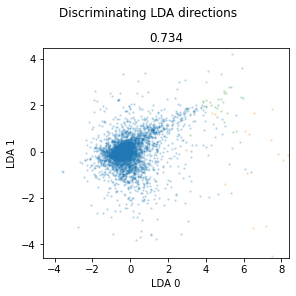

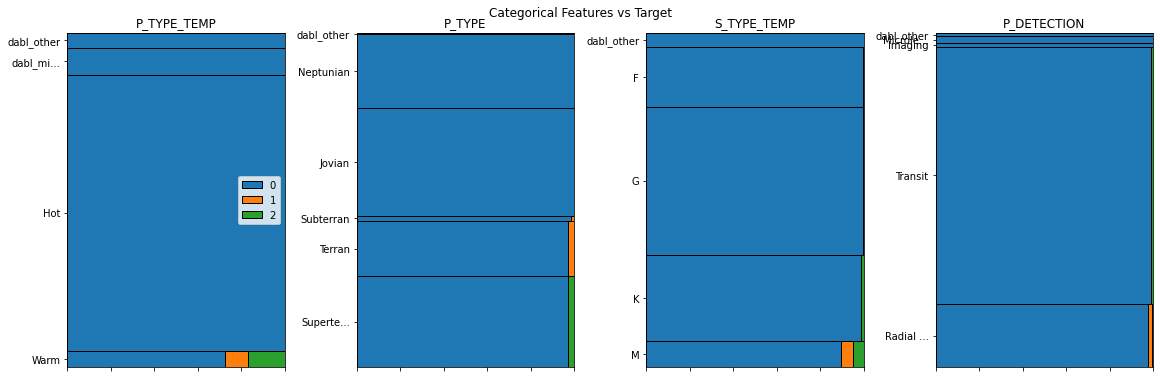

In [ ]:
import dabl
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
dabl.plot(full_data, target_col = 'P_HABITABLE')

# Resolving Class Imbalance with Simple Oversampling Strategy

Clearly the data set is imbalanced having 98.64% inhabitable planets. Only 0.84% and 0.52% are conservatively habitable and optimistically habitable planets respectively. For getting proper performance of the ML models, we need to balance the data set first where each class will be having the same proportion of representation. We are using simple oversampling technique (resampling strategy) for that.

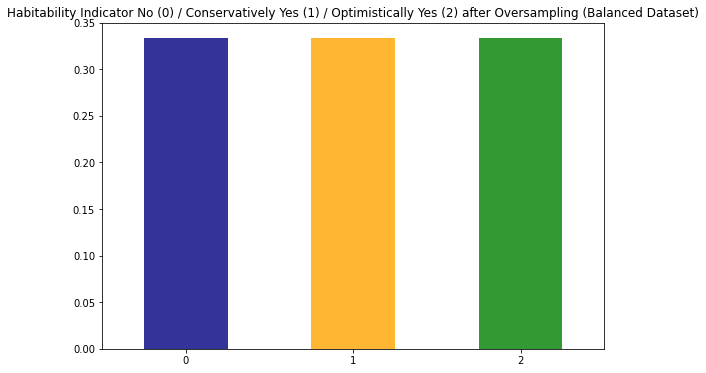

In [ ]:
from sklearn.utils import resample

no = full_data[full_data.P_HABITABLE == 0]
yes_cons = full_data[full_data.P_HABITABLE == 1]
yes_opti = full_data[full_data.P_HABITABLE == 2]
yes_cons_oversampled = resample(yes_cons, replace=True, n_samples=len(no), random_state=12345)
oversampled = pd.concat([no, yes_cons_oversampled])
yes_opti_oversampled = resample(yes_opti, replace=True, n_samples=len(no), random_state=12345)
oversampled = pd.concat([oversampled, yes_opti_oversampled])

fig = plt.figure(figsize = (9,6))
oversampled.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['navy','orange','green'], alpha = 0.8, rot=0)
plt.title('Habitability Indicator No (0) / Conservatively Yes (1) / Optimistically Yes (2) after Oversampling (Balanced Dataset)')
plt.show()

In [ ]:
oversampled['P_HABITABLE'].value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: P_HABITABLE, dtype: float64

Now we can observe that each class is having equal proportion of representation in the oversampled data set.

# Data Analysis through Visualization :

* **Planetary Detection Method:**

We will explore which planetary detection methods have been used extensively (by the word "extensive" we assume: more than 5 planets have been discovered using the method) over the years for discovering exoplanets.

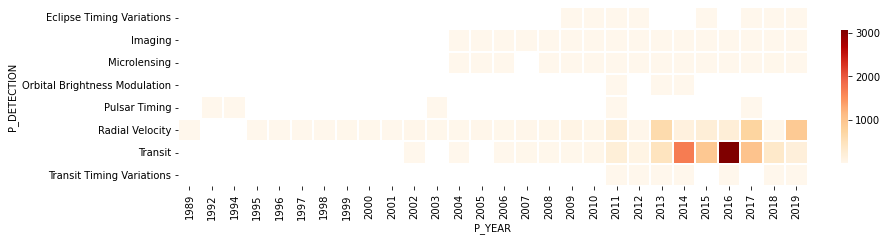

In [ ]:
by_p_detec = (oversampled
            .groupby('P_DETECTION')
            .filter(lambda x : len(x) > 5)
            .groupby(['P_DETECTION', 'P_YEAR'])
            .size()
            .unstack()
           )
import seaborn as sns
plt.figure(figsize=(12,12))
g = sns.heatmap(
    by_p_detec, 
    square=True, 
    cbar_kws={'fraction' : 0.01}, 
    cmap='OrRd',
    linewidth=1
)

We can observe *Transit* and *Radial Velocity* planetary detection techniques have been used most extensively for discovering exoplanets. Now, we will observe, how many planets detected by these two methods have posibility of habitability.

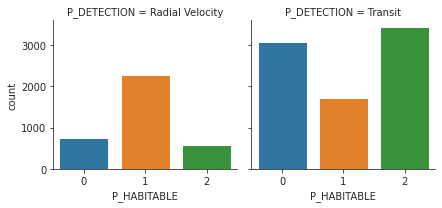

In [ ]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("P_HABITABLE", col="P_DETECTION", col_wrap=3, data=oversampled[oversampled['P_DETECTION'].isin(['Radial Velocity','Transit'])], kind="count", height=3.0, aspect=1.0)

We observe that *Radial Velocity* technique has been used more to detect conservatively habitable exoplanets. *Transit* technique has been used well to detect both optimistically habitable exoplanets and non-habitable exoplanets.

* **Stars and Planets Discovery over the Years:** 

Next, we will explore which planets (under which star) were discovered in which year. This will clarify, how the discovery of exoplanets progressed over the years. All the stars (under whom the planets are listed) belong to different solar systems (not the solar system ruled by Sun). Here, we will plot only the stars which have more than 10 planets attached to them.

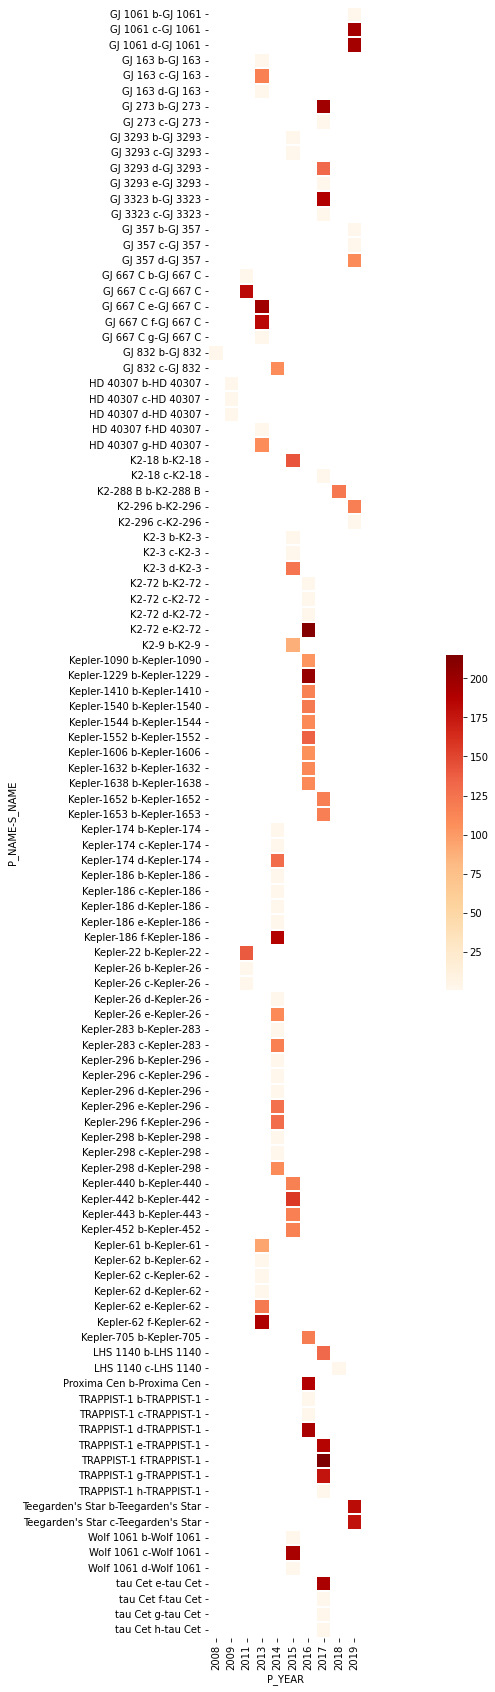

In [ ]:
by_p_s_name = (oversampled
            .groupby('S_NAME')
            .filter(lambda x : len(x) > 10)
            .groupby(['P_NAME', 'S_NAME','P_YEAR'])
            .size()
            .unstack()
           )

plt.figure(figsize=(30,30))
g = sns.heatmap(
    by_p_s_name, 
    square=True, 
    cbar_kws={'fraction' : 0.01}, 
    cmap='OrRd', 
    linewidth=1 
)

We see, for the star GJ667, planets were discovered in older years (2008-2009). For Kepler series stars, the planets were discovered in between years 2011 and 2014. For Trappist and Teegarden series stars, the planets have been discovered in very recent years (2017-2019).

For better exploration, we will consider P_UPDATED date to observe progress of star discovery and planet discovery over the years. We will see a steep increase in trend.

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
stars_by_date = oversampled.groupby('P_UPDATED')['S_NAME'].sum()
stars_by_date.iplot(kind='scatter', title='Discovery of Stars outside Solar System over the Years')

In [ ]:
planets_by_date = oversampled.groupby('P_UPDATED')['P_NAME'].sum()
planets_by_date.iplot(kind='bar', title='Discovery of Exoplanets outside Solar System over the Years')

* **Influence of Planet Type / Star Spectral Type / Planet Thermal Type :**

Now, we will explore how some important features like planet type *(P_TYPE)*, star spectral type *(S_TEMP_TYPE)* and planet thermal type *(P_TYPE_TEMP)* influence the habitability of the exoplanets. Interested folks can go through about the detailed meaning of these features below.

**Planet Type:** (Jovian, Superterran, Neptunian, Subterran, Terran, Miniterran). Their atmosphere can be potentially different. Terrans are able to hold a significant atmosphere with liquid water within the habitable zone (Eg: Earth). Superterrans are able to hold dense atmospheres with liquid water within the habitable zone. Subterrans are able to hold a significant atmospheres after the outer edges of the habitable zone (Eg: Mars). Jovians can have superdense atmospheres in the hot zone. Neptunians can have dense atmospheres in the hot zone. For details, check [Mass-Radius Classification of Exoplanets](http://phl.upr.edu/library/notes/amassclassificationforbothsolarandextrasolarplanets)

**Star Spectral Type (A,B,F,G,K,M,O):** This classification is based mostly on Hydrogen absorption lines. Class A: Stars with darkest H absorbtion lines; Class B: Stars with not as dark lines as Class A; Classes later in the alphabet correspond to weaker lines. Ref: [Classification by Williamina Fleming's group](https://sites.ualberta.ca/~pogosyan/teaching/ASTRO_122/lect12/lecture12.html)

**Planet Thermal Type :** Cold, Hot, Warm

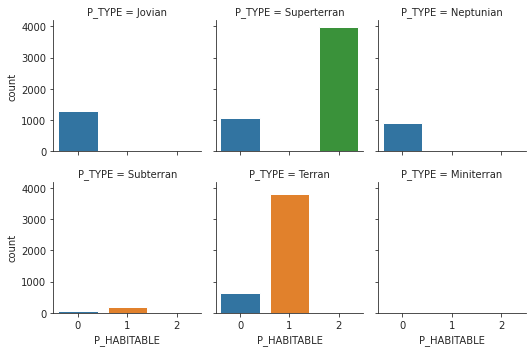

In [ ]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("P_HABITABLE", col="P_TYPE", col_wrap=3, data=oversampled, kind="count", height=2.5, aspect=1.0)

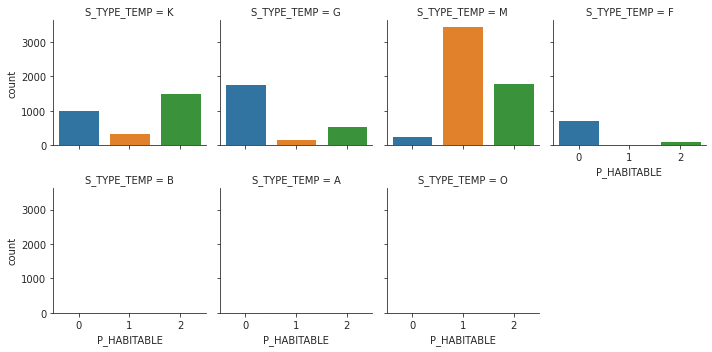

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("P_HABITABLE", col="S_TYPE_TEMP", col_wrap=4, data=oversampled, kind="count", height=2.5, aspect=1.0)

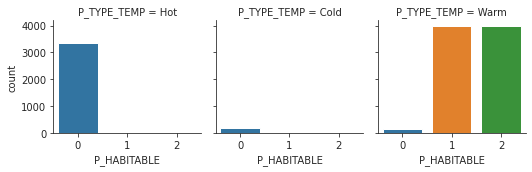

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("P_HABITABLE", col="P_TYPE_TEMP", col_wrap=3, data=oversampled, kind="count", height=2.5, aspect=1.0)

We can see, planet type *superterran* has high number of optimistically habitable planets and planet type *terran* has high number of conservatively habitable planets. Star spectral type *M* has high number of both conservatively habitable and optimistically habitable planets. Planet thermal type *warm* has very high number of both conservatively habitable and optimistically habitable planets.

* **Habitable Planets Discovery Years :**

Next, we will move to see over the years, how many number of habitable planets have been discovered.

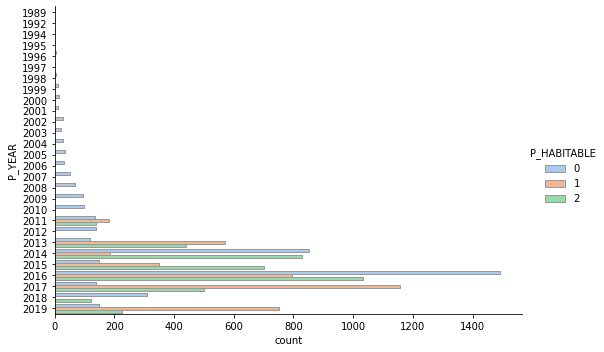

In [ ]:
sns.catplot(y="P_YEAR", hue="P_HABITABLE", kind="count",
            palette="pastel", edgecolor=".6",
            data=oversampled, aspect=1.5)

Notably, maximum number of conservatively habitable exoplanets have been discovered in 2013, 2017, 2019 respectively. And maximum number of optimistically habitable exoplanets have been discovered in 2014 and 2016 respectively.

* **Earth Similarity Index of a Planet and Influence on Habitability :**

Next, we will check for different planet type, how planet thermal type is influencing the earth similarity index, and whether a high earth similarity index (P_ESI) indicates a high possibility of habilitability or not. Interested folks can check the definition of earth similarity index below.

*P_ESI:* The Earth Similarity Index is an open multiparameter measure of Earth-likeness for solar or extrasolar planets as a number between zero (no similarity) and one (identical to Earth) **(*Schulze-Makuch et al., 2011*)**. For more details, please visit [this link](http://phl.upr.edu/projects/earth-similarity-index-esi#:~:text=The%20Earth%20Similarity%20Index%20(ESI,et%20al.%2C%202011).).

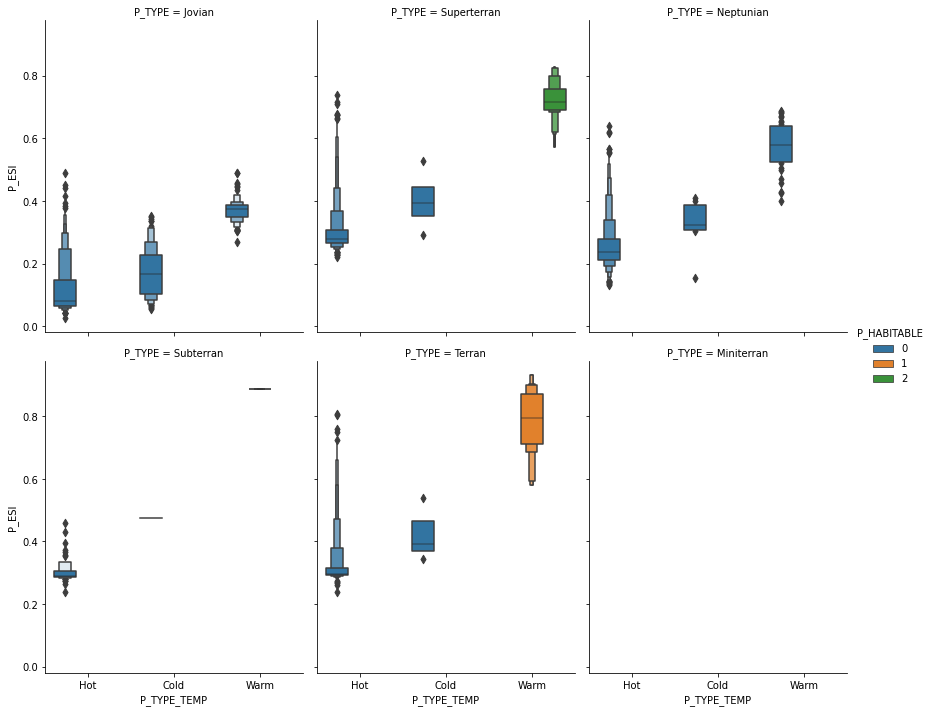

In [ ]:
sns.catplot(x="P_TYPE_TEMP", y="P_ESI", hue="P_HABITABLE",
            col="P_TYPE", col_wrap=3, aspect=0.8,
            kind="boxen", data=oversampled)

We infer that a high earth similarity index of an exoplanet actually corroborates with high possibility of habitability. For superterran planet type, when the planet thermal type is warm, it indicates a high number of optimistically habitable planets. For terran planet type, when planet thermal type is warm, it indicates a high number of conservatively habitable planets.

* **Stellar Constellations having Potentially Habitable Planets :**

Next, we will check the names of star constellations where most of the habitable exoplanets belong.

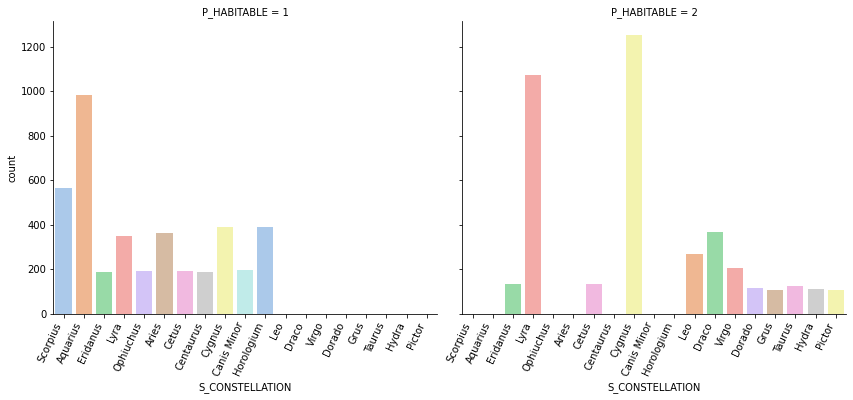

In [ ]:
label_size = 10
plt.rcParams['xtick.labelsize'] = label_size 
chart = sns.catplot(
    data=oversampled[oversampled['P_HABITABLE'].isin([1,2])],
    x='S_CONSTELLATION',
    kind='count',
    palette='pastel',
    col='P_HABITABLE',
    aspect=1.2,
)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

We observe that solar constellation *Aquarius* has the maximum number of conservatively habitable exoplanets. *Cygnus* and *Lyra* have the maximum number of optimistically habitable exoplanets respectively. 

* **Time Frame when Planets with High ESI Discovered :**

Well, now we will scrutinize the exact time frame when planets with high Earth Similarity Index (ESI) have been discovered.

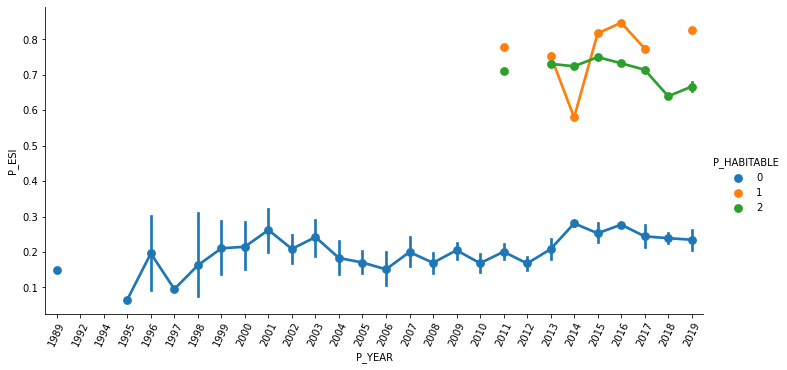

In [ ]:
p_plot = sns.catplot(x="P_YEAR", y="P_ESI", hue="P_HABITABLE", kind="point", data=oversampled, aspect=2.0)
p_plot.set_xticklabels(rotation=65)

Till 2011, only non-habitable planets having ESI less than or equal to 0.3 were discovered. From 2011 till 2019, habitable planets having high ESI (hovering in the range 0.6 - 0.9) have been discovered.

* **Influence of Planet Mass / Planet Radius / Planet Eccentricity on Habitability:**

Next, we will check how planet mass, planet radius and planet eccentricity influence habitability. While understanding mass and radius are pretty simple, understanding eccentricity can be difficult for some. Below is the definition of eccentricity for reference. 

[Eccentricity](https://www.enchantedlearning.com/subjects/astronomy/glossary/Eccentricity.shtml) indicates how the planetary orbit deviates from a perfect circle. A perfectly circular orbit has an eccentricity = 0. A higher number indicates elliptical orbit. 

In [ ]:
import plotly.express as px
fig = px.scatter(oversampled, x=oversampled.P_MASS, y=oversampled.P_ESI, color=oversampled.P_HABITABLE,
                 hover_name=oversampled.P_NAME, log_x=True, size_max=30)
fig.show()

Planet mass in range 0.4 to 3.93 units correspond to conservatively habitable exoplanets. Planet mass in range 5.4 to 8.92 units correspond to optimistically habitable exoplanets. It is interesting to note that conservatively habitable exoplanets have a bit higher ESI compared to the ESI of optimistically habitable exoplanets.

In [ ]:
import plotly.express as px
fig = px.scatter(oversampled, x=oversampled.P_RADIUS, y=oversampled.P_ESI, color=oversampled.P_HABITABLE,
                 hover_name=oversampled.P_NAME, log_x=True, size_max=30)
fig.show()

Planet radius in range 0.77 to 1.41 units correspond to conservatively habitable exoplanets. Planet radius in range 1.52 to 2.46 units correspond to optimistically habitable exoplanets. It is interesting to note that in most of the cases, conservatively habitable exoplanets have a bit higher ESI compared to the ESI of optimistically habitable exoplanets.

In [ ]:
import plotly.express as px
fig = px.scatter(oversampled, x=oversampled.P_ECCENTRICITY, y=oversampled.P_ESI, color=oversampled.P_HABITABLE,
                 hover_name=oversampled.P_NAME, log_x=True, size_max=30)
fig.show()

Planet eccentricity in the range 0.02 to 0.35 units indicate a possibility of habitability. 

* **Influence of Planetary Flux on Habitability :**

Next, we will check the influence of planet's stellar flux in habitability. For this purpose, we have filtered our data first to select only data pertaining to Earth Similarity Index > 0.65. To know how to calculate flux of a planet, check out [this link](http://www3.mpifr-bonn.mpg.de/div/hhertz/documents/smtoum/smtoum/node253.html).

In [ ]:
df = oversampled.query("P_ESI > 0.65")
fig = px.bar(df, x="P_NAME", y="P_FLUX", color="P_HABITABLE") 
fig.show()

We can see very high flux (150-300+ units on Y-axis) is associated with conservatively habitable planets, and moderately high flux (hovering around 150 units on Y-axis) is associated with optimistically habitable planets. Non-habitable planets have very low flux (less than 5 units).

* **Influence of Age of Planet on Habitability :**

Next, we will proceed to check if the age of planet (P_PERIOD) has any significant influence on deciding its habitability. Again we have filtered data to select only the planets with ESI > 0.65

In [ ]:
df = oversampled.query("P_ESI > 0.65")
fig = px.line(df, x="P_NAME", y="P_PERIOD", color="P_HABITABLE", line_group="P_TYPE")
fig.show()

We can see that the conservatively habitable cluster has a period ranging between 9 days to 267 days. Planets under stars GJ 667, Kepler 62, Teegarden's Star, Trappist 1, Kepler 1229, GJ 1061 belong to this cluster. 

Optimistically habitable cluster has a period ranging between 18 days to 448 days. Planets under starts Kepler 1606, Kepler 1638, Kepler 1540, Kepler 1410, Kepler 1653, Kepler 296, K2-296, GJ 832, Kepler 1632, Kepler 1544, LHS 1140, Kepler 26, Kepler 62, Kepler 298, HD 40307 belong to this cluster.   

# Preprocessing of Data :

* **Missing Data Pattern and Imputation :**

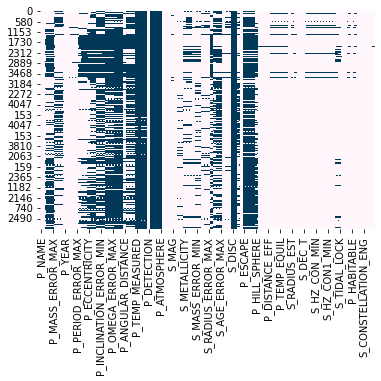

In [ ]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [ ]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(50)

,Total,Percent
P_ALT_NAMES,11979,1.000000
P_GEO_ALBEDO,11979,1.000000
S_DISC,11979,1.000000
P_ATMOSPHERE,11979,1.000000
S_MAGNETIC_FIELD,11979,1.000000
P_DETECTION_MASS,11979,1.000000
P_DETECTION_RADIUS,11979,1.000000
P_GEO_ALBEDO_ERROR_MAX,11469,0.957425
P_GEO_ALBEDO_ERROR_MIN,11469,0.957425
P_TEMP_MEASURED,11469,0.957425


We notice, from 'P_GEO_ALBEDO' till 'P_MASS' all the features are having > 50% missing values. Hence, we will discard those features to avoid bias.

In [ ]:
compact_data = oversampled.drop(['P_GEO_ALBEDO', 'P_DETECTION_MASS', 'P_DETECTION_RADIUS', 'P_ALT_NAMES', 'P_ATMOSPHERE', 'S_DISC', 'S_MAGNETIC_FIELD', 
                 'P_TEMP_MEASURED', 'P_GEO_ALBEDO_ERROR_MIN', 'P_GEO_ALBEDO_ERROR_MAX', 'P_TPERI_ERROR_MAX', 'P_TPERI_ERROR_MIN', 'P_TPERI', 
                 'P_DENSITY', 'P_ESCAPE', 'P_GRAVITY', 'P_POTENTIAL', 'P_OMEGA_ERROR_MAX', 'P_OMEGA_ERROR_MIN', 'P_OMEGA', 'P_INCLINATION_ERROR_MAX', 
                 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION', 'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'S_AGE_ERROR_MIN', 'S_AGE_ERROR_MAX', 
                 'P_IMPACT_PARAMETER_ERROR_MIN', 'P_IMPACT_PARAMETER_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_MASS_ERROR_MAX', 'P_MASS_ERROR_MIN', 'P_HILL_SPHERE', 
                 'P_MASS'], axis = 1) 

In [ ]:
compact_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 2205
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11979 non-null  object 
 1   P_STATUS                     11979 non-null  float64
 2   P_RADIUS                     8239 non-null   float64
 3   P_RADIUS_ERROR_MIN           8205 non-null   float64
 4   P_RADIUS_ERROR_MAX           8205 non-null   float64
 5   P_YEAR                       11979 non-null  int64  
 6   P_UPDATED                    11979 non-null  object 
 7   P_PERIOD                     11869 non-null  float64
 8   P_PERIOD_ERROR_MIN           11738 non-null  float64
 9   P_PERIOD_ERROR_MAX           11738 non-null  float64
 10  P_SEMI_MAJOR_AXIS            8981 non-null   float64
 11  P_SEMI_MAJOR_AXIS_ERROR_MIN  7716 non-null   float64
 12  P_SEMI_MAJOR_AXIS_ERROR_MAX  7717 non-null   float64
 13  P_ECCENTRICITY   

The compact data set is having 77 features. Now we will identify the categorical columns which have missing values, and we will impute them first with mode.

In [ ]:
compact_data.select_dtypes(include=['object']).columns

Index(['P_NAME', 'P_UPDATED', 'P_DETECTION', 'S_NAME', 'S_TYPE', 'S_ALT_NAMES',
       'P_TYPE', 'S_TYPE_TEMP', 'S_RA_T', 'S_DEC_T', 'P_TYPE_TEMP',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object')

In [ ]:
compact_data_obj = compact_data.select_dtypes(include=['object'])

In [ ]:
total = compact_data_obj.isnull().sum().sort_values(ascending=False)
percent = (compact_data_obj.isnull().sum()/compact_data_obj.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
S_TYPE,5853,0.488605
P_TYPE_TEMP,327,0.027298
S_TYPE_TEMP,136,0.011353
P_TYPE,17,0.001419
P_NAME,0,0.000000


In [ ]:
compact_data['S_TYPE'] = compact_data['S_TYPE'].fillna(compact_data['S_TYPE'].mode()[0])
compact_data['P_TYPE_TEMP'] = compact_data['P_TYPE_TEMP'].fillna(compact_data['P_TYPE_TEMP'].mode()[0])
compact_data['S_TYPE_TEMP'] = compact_data['S_TYPE_TEMP'].fillna(compact_data['S_TYPE_TEMP'].mode()[0])
compact_data['P_TYPE'] = compact_data['P_TYPE'].fillna(compact_data['P_TYPE'].mode()[0])

* **Convert Categorical Features to Numerical :**

Now, we will convert the categorical columns to numeric ones using label encoding.

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in compact_data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    compact_data[col] = lencoders[col].fit_transform(compact_data[col])

Next, we will impute the missing values for entire data set (actually only the numeric ones, because we imputed the categorical ones using mode earlier) using MICE package. 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = compact_data.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(compact_data)

In [ ]:
MiceImputed.head()

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0.0,3.0,2.723031,-0.238321,0.310348,2007.0,0.0,326.03000,-0.32,0.32,...,0.0,1.0,0.0,0.083813,24.0,24.0,5.0,12.082709,6165.86330,1.29
1,1.0,3.0,2.723031,-0.238321,0.310348,2009.0,146.0,516.21997,-3.20,3.20,...,0.0,1.0,0.0,0.082414,83.0,83.0,42.0,12.229641,4684.78480,1.53
2,2.0,3.0,2.723031,-0.238321,0.310348,2008.0,0.0,185.84000,-0.23,0.23,...,0.0,1.0,0.0,0.081917,0.0,0.0,2.0,12.848516,1525.57440,0.83
3,3.0,3.0,2.723031,-0.238321,0.310348,2002.0,146.0,1773.40000,-2.50,2.50,...,0.0,0.0,0.0,0.145241,39.0,39.0,34.0,12.865261,1481.07850,2.93
4,4.0,3.0,2.723031,-0.238321,0.310348,1996.0,146.0,798.50000,-1.00,1.00,...,1.0,2.0,0.0,0.368627,30.0,30.0,75.0,13.421749,565.73385,1.66


In [ ]:
MiceImputed.isna().sum(axis = 0)

P_NAME                   0
P_STATUS                 0
P_RADIUS                 0
P_RADIUS_ERROR_MIN       0
P_RADIUS_ERROR_MAX       0
                        ..
S_CONSTELLATION_ABR      0
S_CONSTELLATION_ENG      0
P_RADIUS_EST             0
P_MASS_EST               0
P_SEMI_MAJOR_AXIS_EST    0
Length: 78, dtype: int64

* **Removing Multicollinearity :**

Next, we will check whether perfect correlation exists among any feature pair. To avoid multicollinearity, we will exclude one and keep one from those pairs.

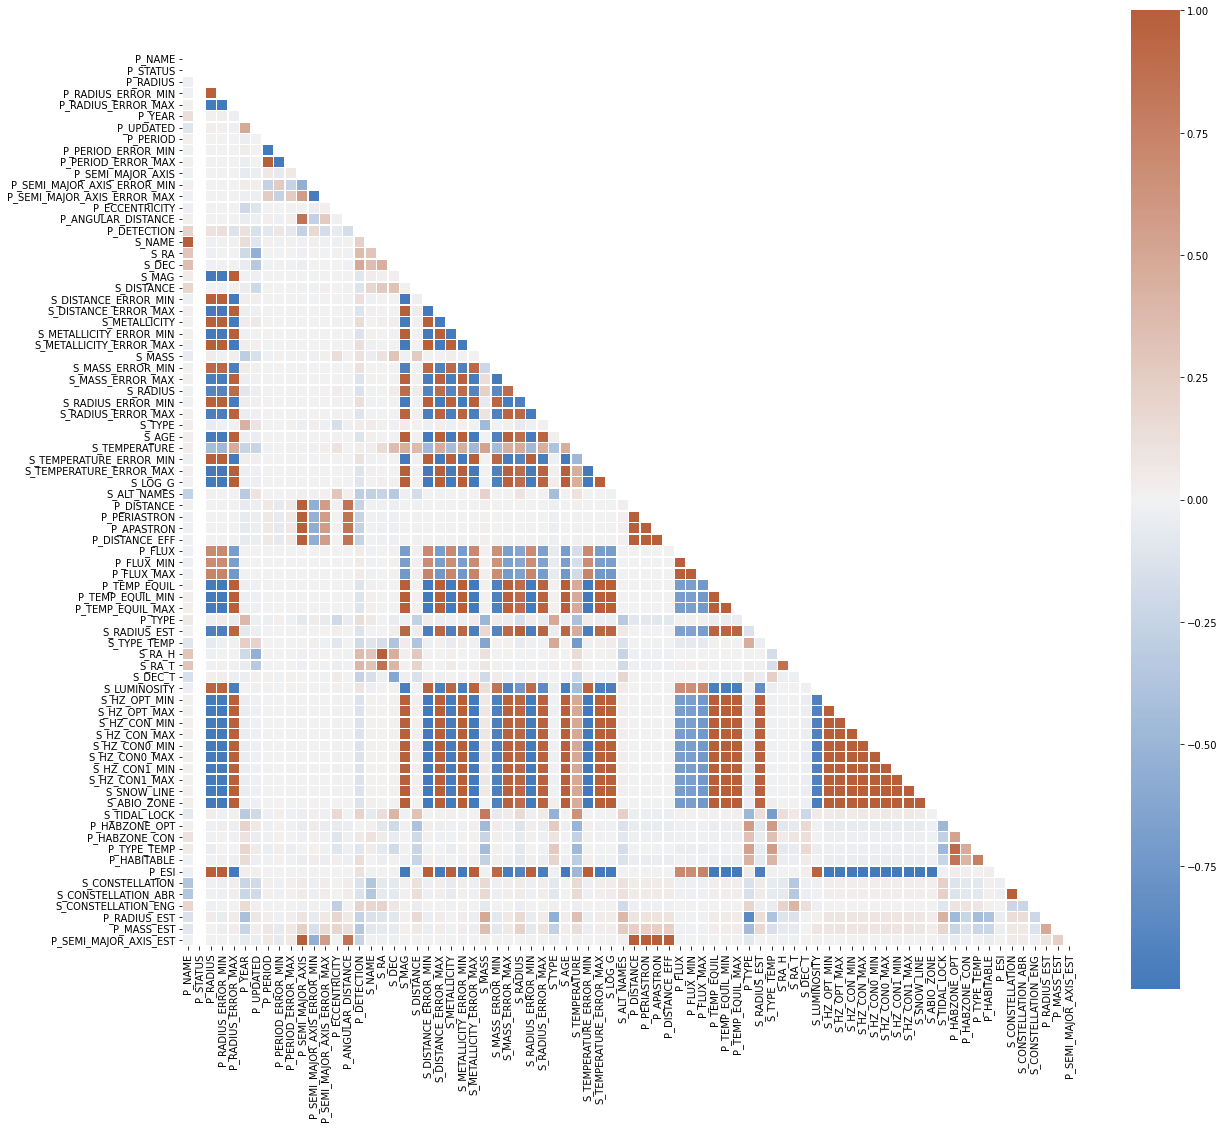

In [ ]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=False, linewidths=.5, cbar_kws={"shrink": 0.9})

We avoided annotation above to maintain clarity of the image, but the dark red squares are evidence of perfect correlation among the pairs of intersecting features. We will discard them.

In [ ]:
#Drop perfectly correlated features
working_data = MiceImputed.drop(['S_NAME', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_DISTANCE', 'P_PERIASTRON', 'P_APASTRON', 
                                 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 
                                 'S_RADIUS_EST', 'S_RA_H', 'S_RA_T', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 
                                 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 
                                'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 
                                 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_AGE', 'S_TEMPERATURE_ERROR_MIN', 
                                 'S_TEMPERATURE_ERROR_MAX', 'S_ABIO_ZONE', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST'], axis=1)

In [ ]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 2205
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11979 non-null  float64
 1   P_STATUS                     11979 non-null  float64
 2   P_YEAR                       11979 non-null  float64
 3   P_UPDATED                    11979 non-null  float64
 4   P_PERIOD                     11979 non-null  float64
 5   P_SEMI_MAJOR_AXIS            11979 non-null  float64
 6   P_SEMI_MAJOR_AXIS_ERROR_MIN  11979 non-null  float64
 7   P_SEMI_MAJOR_AXIS_ERROR_MAX  11979 non-null  float64
 8   P_ECCENTRICITY               11979 non-null  float64
 9   P_ANGULAR_DISTANCE           11979 non-null  float64
 10  P_DETECTION                  11979 non-null  float64
 11  S_RA                         11979 non-null  float64
 12  S_DEC                        11979 non-null  float64
 13  S_DISTANCE       

The working data set is having only 36 features at this stage. Now we will cross-check their correlation once again with annotation whether any square comes up with an annotation "1".

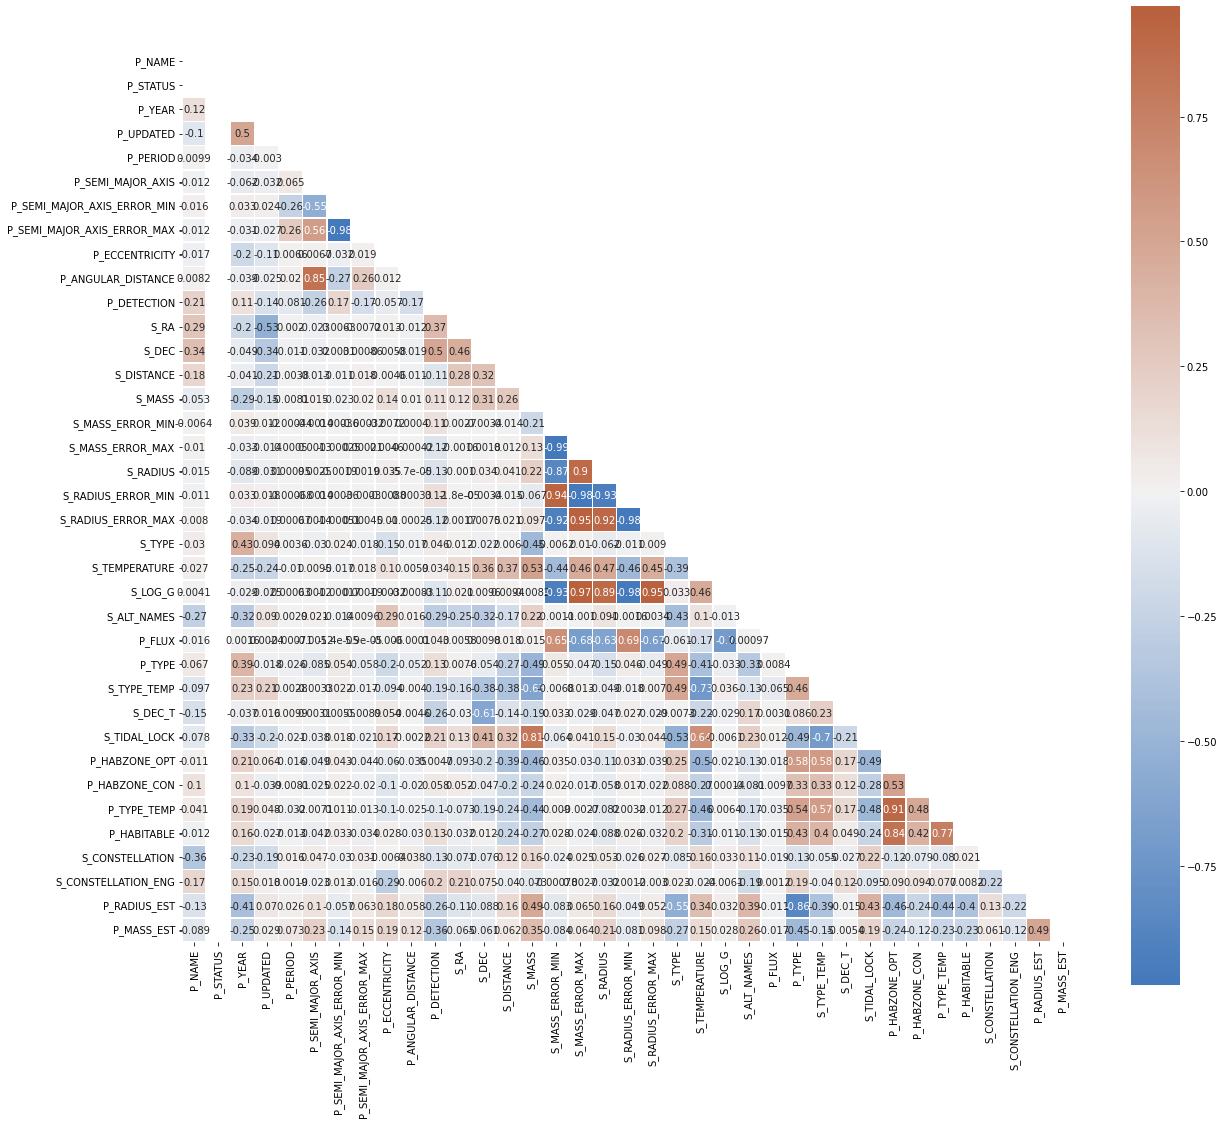

In [ ]:
# Correlation Heatmap for reduced working data set
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = working_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": 0.9})

Some high correlations are spotted but there is no perfect correlation i.e. "1". 

* **Removal of Outliers :**

Next, we will proceed to identify the outliers using IQR (Inter Quartile Range) and will remove those.

In [ ]:
# Detecting outliers with IQR
Q1 = working_data.quantile(0.25)
Q3 = working_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

P_NAME                         2150.000000
P_STATUS                          0.000000
P_YEAR                            3.000000
P_UPDATED                        90.000000
P_PERIOD                        101.914721
P_SEMI_MAJOR_AXIS                 0.198560
P_SEMI_MAJOR_AXIS_ERROR_MIN       0.094715
P_SEMI_MAJOR_AXIS_ERROR_MAX       0.101550
P_ECCENTRICITY                    0.045047
P_ANGULAR_DISTANCE               58.917636
P_DETECTION                       1.000000
S_RA                            122.166550
S_DEC                            54.138227
S_DISTANCE                      481.440000
S_MASS                            0.520000
S_MASS_ERROR_MIN                  0.050000
S_MASS_ERROR_MAX                  0.050000
S_RADIUS                          0.540000
S_RADIUS_ERROR_MIN                0.060547
S_RADIUS_ERROR_MAX                0.087495
S_TYPE                            0.000000
S_TEMPERATURE                  1997.530000
S_LOG_G                           0.413547
S_ALT_NAMES

In [ ]:
# Removing outliers from dataset
working_data = working_data[~((working_data < (Q1 - 1.5 * IQR)) |(working_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Feature Selection :

After completion of data preprocessing, we will select the really important features which are contributing towards habitability of the exoplanets. We will use permutation importance using Random Forest and wrapper method using Random Forest as well as Extra Trees classifier. 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 37.0 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=63ce8ab56eb6796aec44a07828340ebc26fea62f98b705f1fdd75f8ca6bacc04
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier as rf

X = working_data.drop('P_HABITABLE', axis=1)
y = working_data['P_HABITABLE']
perm = PermutationImportance(rf(n_estimators=10, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0 ± 0.0000,S_TYPE
0 ± 0.0000,P_UPDATED
0 ± 0.0000,P_PERIOD
0 ± 0.0000,P_SEMI_MAJOR_AXIS
0 ± 0.0000,P_SEMI_MAJOR_AXIS_ERROR_MIN
0 ± 0.0000,P_SEMI_MAJOR_AXIS_ERROR_MAX
0 ± 0.0000,P_ECCENTRICITY
0 ± 0.0000,P_ANGULAR_DISTANCE
0 ± 0.0000,P_DETECTION
0 ± 0.0000,S_RA


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

#X = working_data.drop('P_HABITABLE', axis=1)
#y = MiceImputed['P_HABITABLE']
selector = SelectFromModel(rf(n_estimators=1000, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=1000, random_state=0).fit(X,y).feature_importances_)

['P_PERIOD', 'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TYPE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_RADIUS_EST', 'P_MASS_EST']
[0.01044707 0.         0.00119292 0.00774545 0.03388669 0.00286724
 0.01328137 0.0104633  0.02556892 0.01468601 0.00070391 0.00990423
 0.03399132 0.0947533  0.05856475 0.00459842 0.00318469 0.00595312
 0.00180363 0.00163513 0.         0.046996   0.01090993 0.
 0.07120151 0.07599288 0.01439462 0.02697967 0.05053458 0.05233967
 0.00358481 0.05349495 0.00114314 0.00143936 0.13318933 0.12256809]


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier as et

#X = working_data.drop('P_HABITABLE', axis=1)
#y = MiceImputed['P_HABITABLE']
selector = SelectFromModel(et(n_estimators=1000, random_state=123))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(et(n_estimators=100, random_state=123).fit(X,y).feature_importances_)

['P_PERIOD', 'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_ECCENTRICITY', 'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TYPE', 'S_TYPE_TEMP', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_RADIUS_EST', 'P_MASS_EST']
[0.02010983 0.         0.00778255 0.00290765 0.0276073  0.01277201
 0.04657262 0.01889205 0.0655003  0.01804884 0.01106415 0.01185249
 0.05824961 0.04842893 0.04189626 0.00289751 0.01018307 0.01180769
 0.00490049 0.011097   0.         0.04303133 0.02658596 0.
 0.0351621  0.1148477  0.03073959 0.01176179 0.02274944 0.08427842
 0.01235862 0.05674957 0.01358333 0.00899217 0.07019236 0.03639728]


From the three sets of important features, we will choose the ones which appear repeatedly in more than one method. The chosen ones are really important features.

# Train-Test Split:

In [ ]:
features = working_data[['P_TYPE_TEMP','P_PERIOD','S_DEC','S_DISTANCE','S_MASS','S_TEMPERATURE','P_TYPE','S_TIDAL_LOCK','P_HABZONE_OPT','P_RADIUS_EST']]
target = working_data['P_HABITABLE']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=12345)

# Normalize Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modelling with Supervised Learning:

We are using ***one-vs-rest strategy*** for all classifiers for ***multi-class classification*** problem. This strategy breaks down a multi-class classification problem to multiple binary classification problems and then compares/ combines the results. The following models are used for classification purpose.
* Logistic Regression with Ridge Penalty
* Stochastic Gradient Descent with Lasso Penalty
* Multinomial Naive Bayes
* Passive Aggressive Classifier with Hinge Loss
* Perceptron
* Gradient Boosting Classifier

In [ ]:
# Common function
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, cohen_kappa_score, plot_confusion_matrix, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model_ovr = OneVsRestClassifier(model)
        model_ovr.fit(X_train,y_train, verbose=0)
    else:
        model_ovr = OneVsRestClassifier(model)
        model_ovr.fit(X_train,y_train)
    y_pred = model_ovr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    h_loss = hamming_loss(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("Hamming Loss = {}".format(h_loss))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model_ovr, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')   
    
    return accuracy, h_loss, coh_kap, time_taken

**[1] Logistic Regression with Ridge Penalty :**

Accuracy = 0.998639455782313
Hamming Loss = 0.0013605442176870747
Cohen's Kappa = 0.9975693399517837
Time taken = 1.0429177284240723
              precision    recall  f1-score   support

         0.0    1.00000   0.98246   0.99115        57
         1.0    0.99742   1.00000   0.99871       386
         2.0    1.00000   1.00000   1.00000       292

    accuracy                        0.99864       735
   macro avg    0.99914   0.99415   0.99662       735
weighted avg    0.99864   0.99864   0.99863       735



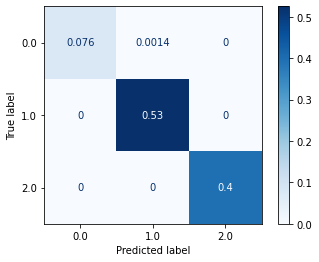

In [ ]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'saga', 'multi_class':'multinomial'} #Ridge regularization
model_lr = LogisticRegression(**params_lr)
accuracy_lr, h_loss_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

**[2] Stochastic Gradient Descent with Hinge Loss and Lasso Penalty :**

Accuracy = 0.998639455782313
Hamming Loss = 0.0013605442176870747
Cohen's Kappa = 0.9975693399517837
Time taken = 0.03972196578979492
              precision    recall  f1-score   support

         0.0    1.00000   0.98246   0.99115        57
         1.0    0.99742   1.00000   0.99871       386
         2.0    1.00000   1.00000   1.00000       292

    accuracy                        0.99864       735
   macro avg    0.99914   0.99415   0.99662       735
weighted avg    0.99864   0.99864   0.99863       735



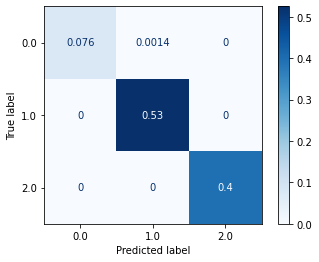

In [ ]:
from sklearn.linear_model import SGDClassifier
# Lasso regularization
params_sgd = {'loss':'hinge', 'penalty':'l2', 'alpha': 1e-3, 'random_state': 12345, 'max_iter': 6, 'tol': None}
model_sgd = SGDClassifier(**params_sgd)
accuracy_sgd, h_loss_sgd, coh_kap_sgd, tt_sgd = run_model(model_sgd, X_train, y_train, X_test, y_test)

**[3] Multinomial Naive Bayes :**

Accuracy = 0.8503401360544217
Hamming Loss = 0.14965986394557823
Cohen's Kappa = 0.7206433667916314
Time taken = 0.05590176582336426
              precision    recall  f1-score   support

         0.0    0.00000   0.00000   0.00000        57
         1.0    0.92987   0.92746   0.92866       386
         2.0    0.76286   0.91438   0.83178       292

    accuracy                        0.85034       735
   macro avg    0.56424   0.61395   0.58681       735
weighted avg    0.79141   0.85034   0.81815       735



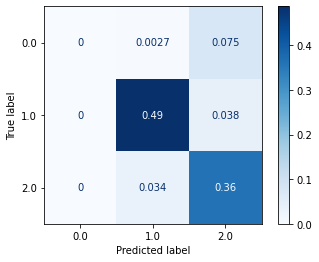

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB()
accuracy_mnb, h_loss_mnb, coh_kap_mnb, tt_mnb = run_model(model_mnb, X_train, y_train, X_test, y_test)

**[4] Passive Aggressive Classifier with Hinge Loss :**

Accuracy = 1.0
Hamming Loss = 0.0
Cohen's Kappa = 1.0
Time taken = 0.03376936912536621
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000        57
         1.0    1.00000   1.00000   1.00000       386
         2.0    1.00000   1.00000   1.00000       292

    accuracy                        1.00000       735
   macro avg    1.00000   1.00000   1.00000       735
weighted avg    1.00000   1.00000   1.00000       735



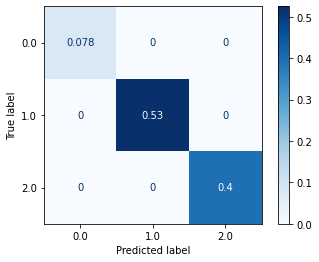

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
params_pac = {'fit_intercept':True, 'random_state': 12345, 'loss':'hinge'}
model_pac = PassiveAggressiveClassifier(**params_pac)
accuracy_pac, h_loss_pac, coh_kap_pac, tt_pac = run_model(model_pac, X_train, y_train, X_test, y_test)

**[5] Simple Perceptron without any Penalty :**

Accuracy = 0.998639455782313
Hamming Loss = 0.0013605442176870747
Cohen's Kappa = 0.9975693399517837
Time taken = 0.07597589492797852
              precision    recall  f1-score   support

         0.0    1.00000   0.98246   0.99115        57
         1.0    0.99742   1.00000   0.99871       386
         2.0    1.00000   1.00000   1.00000       292

    accuracy                        0.99864       735
   macro avg    0.99914   0.99415   0.99662       735
weighted avg    0.99864   0.99864   0.99863       735



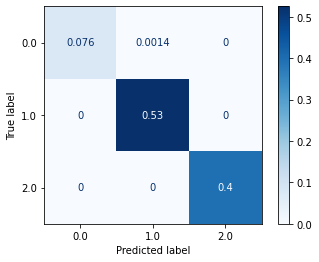

In [ ]:
from sklearn.linear_model import Perceptron
params_p = {'penalty':None, 'alpha': 1e-5, 'fit_intercept': True, 'random_state': 12345}
model_p = Perceptron(**params_p)
accuracy_p, h_loss_p, coh_kap_p, tt_p = run_model(model_p, X_train, y_train, X_test, y_test)

**[6] Gradient Boosting Classifier :**

Accuracy = 0.9673469387755103
Hamming Loss = 0.0326530612244898
Cohen's Kappa = 0.9412900219663183
Time taken = 1.6075727939605713
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000        57
         1.0    0.94146   1.00000   0.96985       386
         2.0    1.00000   0.91781   0.95714       292

    accuracy                        0.96735       735
   macro avg    0.98049   0.97260   0.97566       735
weighted avg    0.96926   0.96735   0.96714       735



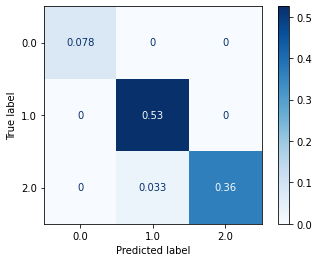

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
params_gb = {'loss':'deviance', 'criterion': 'mse', 'n_estimators': 100, 'max_depth': 4, 'random_state': 12345, 'max_features': 'auto'}
model_gb = GradientBoostingClassifier(**params_gb)
accuracy_gb, h_loss_gb, coh_kap_gb, tt_gb = run_model(model_gb, X_train, y_train, X_test, y_test)

* **Decision Boundary Plotting for the Models :**

We will also perform decision region plotting in order to determine model performance properly.

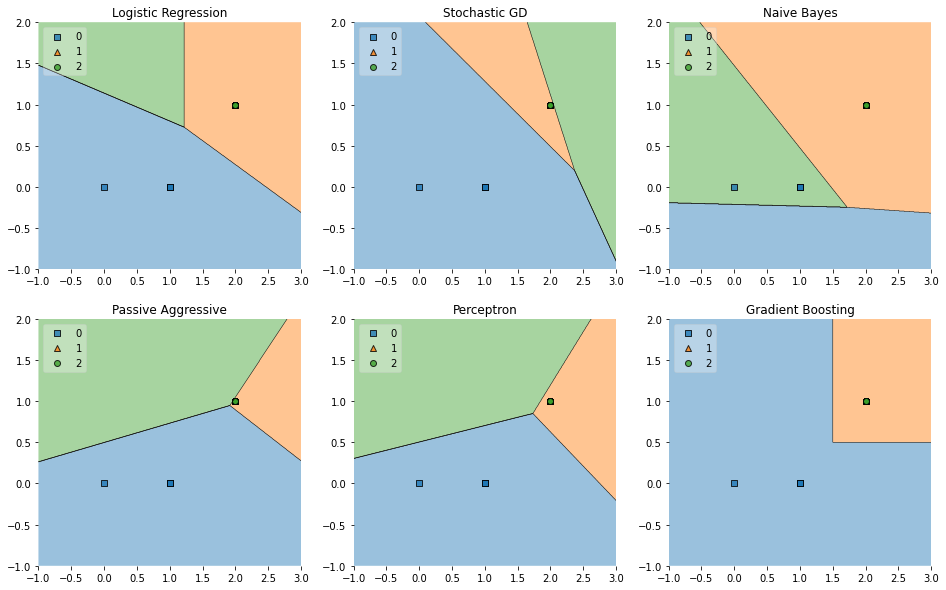

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

value = 1.50
width = 0.75

clf1 = LogisticRegression(solver='saga', penalty='l1', random_state=12345)
clf2 = SGDClassifier(random_state=12345)
clf3 = MultinomialNB()
clf4 = PassiveAggressiveClassifier(random_state=12345) 
clf5 = Perceptron(random_state=12345, verbose = 0)
clf6 = GradientBoostingClassifier(n_estimators=1000, random_state=12345, verbose=0)

#Only taking the important planetarial features 
X_list = working_data[["P_TYPE_TEMP", "P_HABZONE_OPT", "P_RADIUS_EST"]] 
X = np.asarray(X_list, dtype=np.float32)
y_list = working_data["P_HABITABLE"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(2,3)
fig = plt.figure(figsize=(16,10))

labels = ['Logistic Regression',
          'Stochastic GD',
          'Naive Bayes',
          'Passive Aggressive',
          'Perceptron',
          'Gradient Boosting']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value}, 
                                filler_feature_ranges={2: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

We can observe a striking similarity in decision boundaries plotted by Passive Aggressive classifier and Peceptron model. Both of them have demarcated three class regions aptly and have very low misclassification. Apart from these two models, linear models like Logistic Regression and Stochastic Gradient Descent have also lower misclassifiction.

# Supervised Models Comparison :

We will take accuracy score, hinge loss, cohen kappa and time taken for execution into account for judging model performance. This apart we have already explored our observation from decision boundary plotting in previous step above.

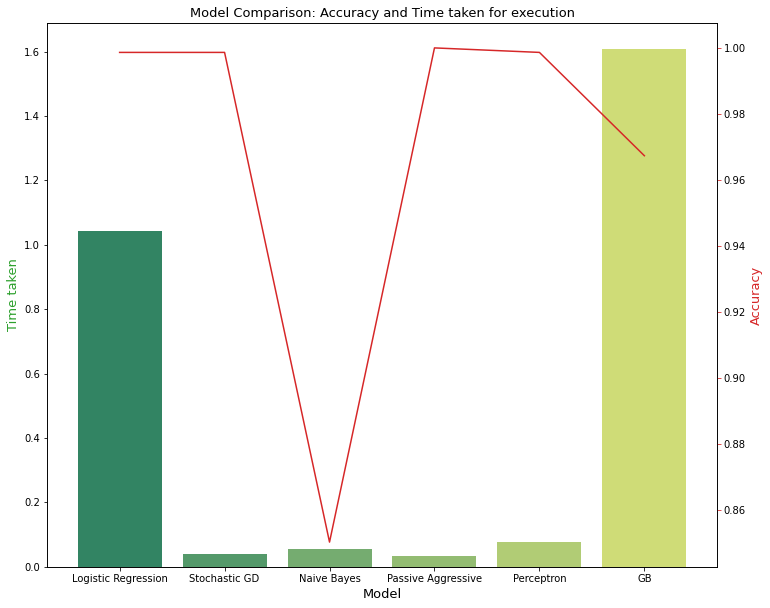

In [ ]:
accuracy_scores = [accuracy_lr, accuracy_sgd, accuracy_mnb, accuracy_pac, accuracy_p, accuracy_gb]
h_loss_scores = [h_loss_lr, h_loss_sgd, h_loss_mnb, h_loss_pac, h_loss_p, h_loss_gb]
coh_kap_scores = [coh_kap_lr, coh_kap_sgd, coh_kap_mnb, coh_kap_pac, coh_kap_p, coh_kap_gb]
tt = [tt_lr, tt_sgd, tt_mnb, tt_pac, tt_p, tt_gb]

model_data = {'Model': ['Logistic Regression','Stochastic GD','Naive Bayes','Passive Aggressive','Perceptron','GB'],
              'Accuracy': accuracy_scores,
              'Hamming_Loss': h_loss_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

Passive Aggressive classifier, Perceptron, Stochastic GD have the highest accuracy and lowest execution time.

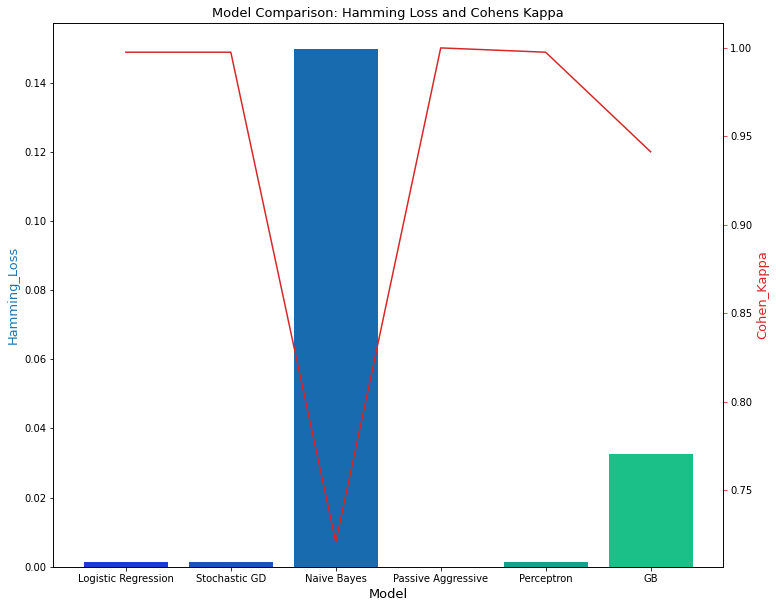

In [ ]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Hamming Loss and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('Hamming_Loss', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='Hamming_Loss', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

***Passive Aggressive classifier*** has zero hinge loss and the highest Cohen's Kappa. Hence, this is the ***best performing model*** applicable on exoplanet habitability classificaion data set.

# Experimenting with Unsupervised Learning :

We will remove the habitability labels from the data set first. Then we will apply K-Means clustering model to cross-check whether it is giving rise to three distinct clusters or not.

In [ ]:
working_data_unsup = working_data.drop(['P_HABITABLE'], axis=1)

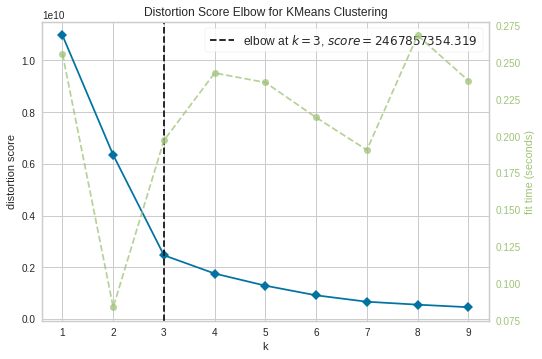

In [ ]:
#Plotting Elbow Curve
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(working_data_unsup)    
visualizer.poof()

Yes, we got 3 clusters as the ideal number. Now, we will fit data into the K-Means model to get the cluster centers.

In [ ]:
#Fitting data into K-Means model with 3 clusters
km_3 = KMeans(n_clusters=3,random_state=12345)
km_3.fit(working_data_unsup)
print(km_3.cluster_centers_)

[[ 3.81383613e+03  3.00000000e+00  2.01674710e+03  9.19806452e+01
   7.88926369e+00  3.22010153e-02 -1.24225887e-03  1.25776779e-03
   6.97304973e-02  2.78896680e+00  8.00000000e+00  3.46540862e+02
  -4.97546749e+00  1.26075097e+01  8.05290323e-02 -1.00258065e-02
   1.00258065e-02  1.20438710e-01 -3.87096774e-05  3.87096774e-05
   1.75000000e+02  2.56038323e+03  4.25714121e+00  0.00000000e+00
   6.60403957e-01  4.49806452e+00  5.00000000e+00  2.31696774e+03
   1.98994425e-01  9.94838710e-01  7.45806452e-01  1.99354839e+00
   3.06193548e+00  8.29561290e+01  9.67574877e-01  7.56106855e-01]
 [ 4.83015287e+02  3.00000000e+00  2.01337197e+03  3.19477707e+01
   3.79453061e+01  1.48131928e-01 -1.62179813e-02  1.34484714e-02
   4.76915141e-02  1.80322161e+01  7.28025478e+00  2.80699394e+02
  -2.78250489e+01  2.44037707e+01  3.14840764e-01 -3.94140127e-02
   3.66751592e-02  6.82227540e-01 -6.65080291e-02  8.59043140e-02
   1.75000000e+02  3.35715803e+03  4.57192018e+00  0.00000000e+00
   1.0591

In [ ]:
pd.Series(km_3.labels_).value_counts()

2    2112
1     785
0     775
dtype: int64

We got 1818 unhabitable, 786 conservatively habitable and 775 optimistically habitable exoplanets.

In [ ]:
# calculate Silhouette Coefficient for K=3
from sklearn import metrics
metrics.silhouette_score(working_data_unsup, km_3.labels_)

0.6379708208645639

In [ ]:
cluster_labels = km_3.fit_predict(working_data)

Next, we will label each data point with its appropriate cluster type (0,1,2) respectively. We will store the labels in a newly added column **"KM_Clusters"** in the dataframe.

In [ ]:
# Prediction
preds = km_3.labels_
data_df = pd.DataFrame(working_data_unsup)
data_df['KM_Clusters'] = preds
data_df.head(10)

,P_NAME,P_STATUS,P_YEAR,P_UPDATED,P_PERIOD,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_ERROR_MIN,P_SEMI_MAJOR_AXIS_ERROR_MAX,P_ECCENTRICITY,P_ANGULAR_DISTANCE,...,S_DEC_T,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,S_CONSTELLATION,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,KM_Clusters
176,179.0,3.0,2011.0,0.0,7.200400,0.0505,-0.0053,0.0044,0.130000,7.430,...,2782.0,0.277482,0.0,0.0,1.0,72.0,63.0,2.25747,5.720904,1
948,951.0,3.0,2017.0,113.0,9.562742,0.0780,-0.0030,0.0030,0.140000,0.269,...,250.0,0.407663,0.0,0.0,1.0,11.0,18.0,2.00659,4.683818,2
984,987.0,3.0,2018.0,127.0,6.922600,0.0616,-0.0019,0.0019,0.107568,0.509,...,7.0,0.399628,0.0,0.0,1.0,20.0,85.0,1.72634,3.628101,2
985,988.0,3.0,2018.0,127.0,9.757900,0.0774,-0.0024,0.0024,0.107568,0.640,...,7.0,0.399628,0.0,0.0,1.0,20.0,85.0,1.63666,3.313943,2
989,992.0,3.0,2018.0,149.0,3.835476,0.0373,-0.0002,0.0002,0.107568,0.536,...,155.0,0.358688,0.0,0.0,1.0,65.0,26.0,1.49093,2.828671,2
1037,1040.0,3.0,2018.0,149.0,16.995731,0.1229,-0.0009,0.0009,0.107568,1.620,...,218.0,0.438716,0.0,0.0,1.0,11.0,18.0,1.54698,3.011575,2
1151,1154.0,3.0,2018.0,149.0,7.814000,0.0679,-0.0011,0.0011,0.042000,0.880,...,37.0,0.407663,0.0,0.0,1.0,76.0,68.0,0.70623,0.289223,2
1163,1166.0,3.0,2018.0,149.0,14.129714,0.1064,-0.0009,0.0008,0.107568,0.457,...,303.0,0.430044,0.0,0.0,1.0,11.0,18.0,2.19716,5.463843,2
1219,1224.0,3.0,2016.0,72.0,31.637200,0.1779,-0.0016,0.0016,0.107568,0.503,...,74.0,0.419152,0.0,0.0,1.0,45.0,41.0,1.89449,4.248273,2
1227,1232.0,3.0,2016.0,72.0,9.784300,0.0671,-0.0037,0.0037,0.107568,0.382,...,2503.0,0.345489,0.0,0.0,1.0,3.0,83.0,1.15463,1.627069,1


We will now choose some random pairs of features to visualize three distinct clusters.

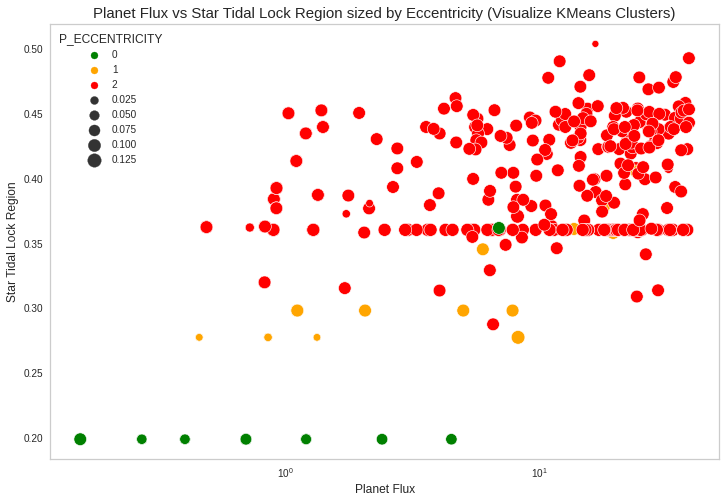

In [ ]:
#Visualize clusters: Feature Pair-1
import seaborn as sns
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(12,8))
#Planet Flux vs Star Tidal Lock Region 
g =sns.scatterplot(x=working_data_unsup.iloc[:,24], y=working_data_unsup.iloc[:,28],
              hue=cluster_labels,
              data=working_data_unsup, 
              palette=['green','orange','red'], edgecolor='white', size='P_ECCENTRICITY', sizes=(50,200));
g.set(xscale="log");
g.grid(False)
plt.title("Planet Flux vs Star Tidal Lock Region sized by Eccentricity (Visualize KMeans Clusters)", fontsize=15)
plt.xlabel("Planet Flux", fontsize=12)
plt.ylabel("Star Tidal Lock Region", fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

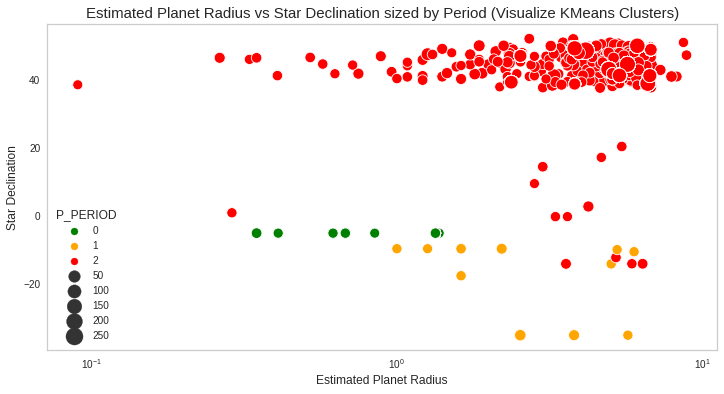

In [ ]:
#Visualize clusters: Feature Pair-2
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(12,6))
#Estimated Planet Radius vs Star Declination 
g =sns.scatterplot(x=working_data_unsup.iloc[:,35], y=working_data_unsup.iloc[:,12],
              hue=cluster_labels,
              data=working_data_unsup, 
              palette=['green','orange','red'], size='P_PERIOD', sizes=(100,300));
g.set(xscale="log");
g.grid(False)
plt.title("Estimated Planet Radius vs Star Declination sized by Period (Visualize KMeans Clusters)", fontsize=15)
plt.xlabel("Estimated Planet Radius", fontsize=12)
plt.ylabel("Star Declination", fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

Well, we found very clearly distinguishable three observable clusters in both of these pictures above. Hence, we can conclude that the labels marked by K-Means algorithm are credible enough. 